# Electrical Conductance and Seebeck

In [1]:
import numpy as np

"""1/beta, x1, x2, zT, GS^2, S"""
data_opt = np.loadtxt('const_dom.csv',delimiter=',')
opt_G = data_opt[:,4] / (data_opt[:,5]**2)
opt_width = (data_opt[:,2] - data_opt[:,1])[..., np.newaxis]
beta_list = (1/data_opt[:,0])[..., np.newaxis]

In [2]:
opt_coeff = np.stack([opt_G, data_opt[:, 5], data_opt[:,3]], axis=1)

In [3]:
from equation import sigma_seebeck_zT

## Shift up

In [4]:
def solve_shift_up():
    x_shift_up = data_opt[:, 1:3] + opt_width/2
    data_shift_up = []
    for x1, x2, beta in np.hstack([x_shift_up, beta_list]):
        data_shift_up.append(sigma_seebeck_zT(x1, x2, beta))
    return np.vstack(data_shift_up)
data_shift_up = solve_shift_up()

e:\Users\Admin\GitProjects\OptimizeTransmission\linear\equation.py:142: RuntimeWarning: invalid value encountered in true_divide
  np.divide(i1, i0),
e:\Users\Admin\GitProjects\OptimizeTransmission\linear\equation.py:143: RuntimeWarning: invalid value encountered in true_divide
  np.divide(i12, ((I(x1,x2,2,dom)+beta)*i0-i12))


## Shift down

In [5]:
def solve_shift_down():
    x_shift_down = data_opt[:, 1:3] - opt_width/2
    data_shift_down = []
    for x1, x2, beta in np.hstack([x_shift_down, beta_list]):
        data_shift_down.append(sigma_seebeck_zT(x1, x2, beta))
    return np.vstack(data_shift_down)
data_shift_down = solve_shift_down()

## Broaden

In [6]:
def solve_broaden():
    x_broaden = data_opt[:, 1:3] + opt_width/2 * np.array([-1,1])
    data_broaden = []
    for x1, x2, beta in np.hstack([x_broaden, beta_list]):
        data_broaden.append(sigma_seebeck_zT(x1, x2, beta))
    return np.vstack(data_broaden)
data_broaden = solve_broaden()

## Narrow

In [7]:
def solve_narrow():
    x_narrow = data_opt[:, 1:3] + opt_width/4 * np.array([1,-1])
    data_narrow = []
    for x1, x2, beta in np.hstack([x_narrow, beta_list]):
        data_narrow.append(sigma_seebeck_zT(x1, x2, beta))
    return np.vstack(data_narrow)
data_narrow = solve_narrow()

In [8]:
data_narrow.shape

(301, 3)

## Trapezoid

In [9]:
from dom import trapezoid as trapezoid_dom

def solve_trapezoid():
    x_support = data_opt[:, 1:3] + opt_width * np.array([-1,1])
    data_trapezoid = []
    for x1, x2, x1_support, x2_support, beta in np.hstack([data_opt[:, 1:3], x_support, beta_list]):
        data_trapezoid.append(sigma_seebeck_zT(
            x1_support, x2_support, beta,
            lambda x: trapezoid_dom(x, x1, x2)
        ))
    return np.vstack(data_trapezoid)
data_trapezoid = solve_trapezoid()

In [10]:
data_trapezoid.shape

(301, 3)

## Plot

In [11]:
from plot import multi_plot

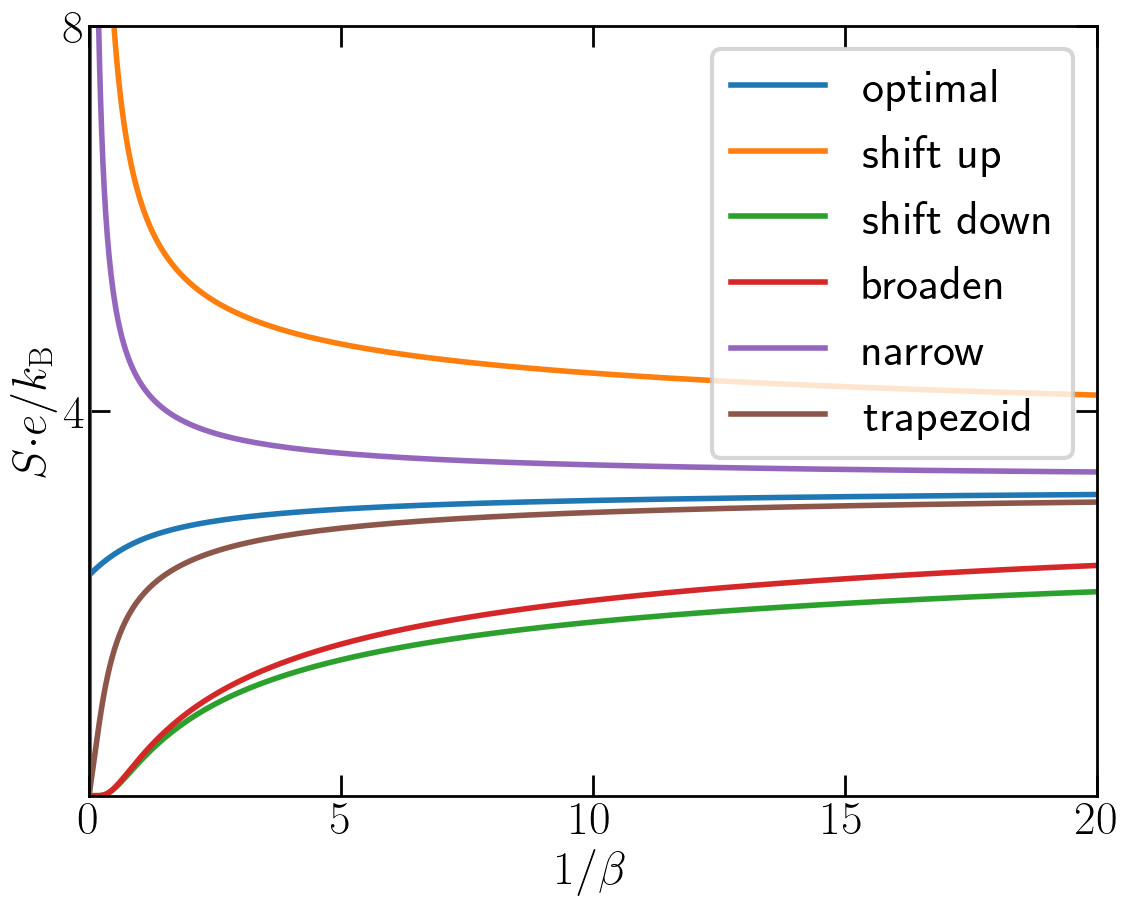

In [24]:
def plot_seebeck(axes=None):
    y_list = [
        opt_coeff[:,1],
        data_shift_up[:,1],
        data_shift_down[:,1],
        data_broaden[:,1],
        data_narrow[:,1],
        data_trapezoid[:,1],
    ]
    legend_list = [
        'optimal',
        'shift up',
        'shift down',
        'broaden',
        'narrow',
        'trapezoid',
    ]
    axes = multi_plot(data_opt[:,0], y_list, legend_list, axes)
    _, ax = axes
    ax.set_xlabel(r'$1/\beta$')
    ax.set_ylabel(r'$S{\cdot}e/k_\mathrm{B}$')
    ax.legend()
    ax.set_xlim([0,20])
    ax.set_ylim([0, 8])
    ax.set_yticks([4, 8])
    return axes
_ = plot_seebeck()

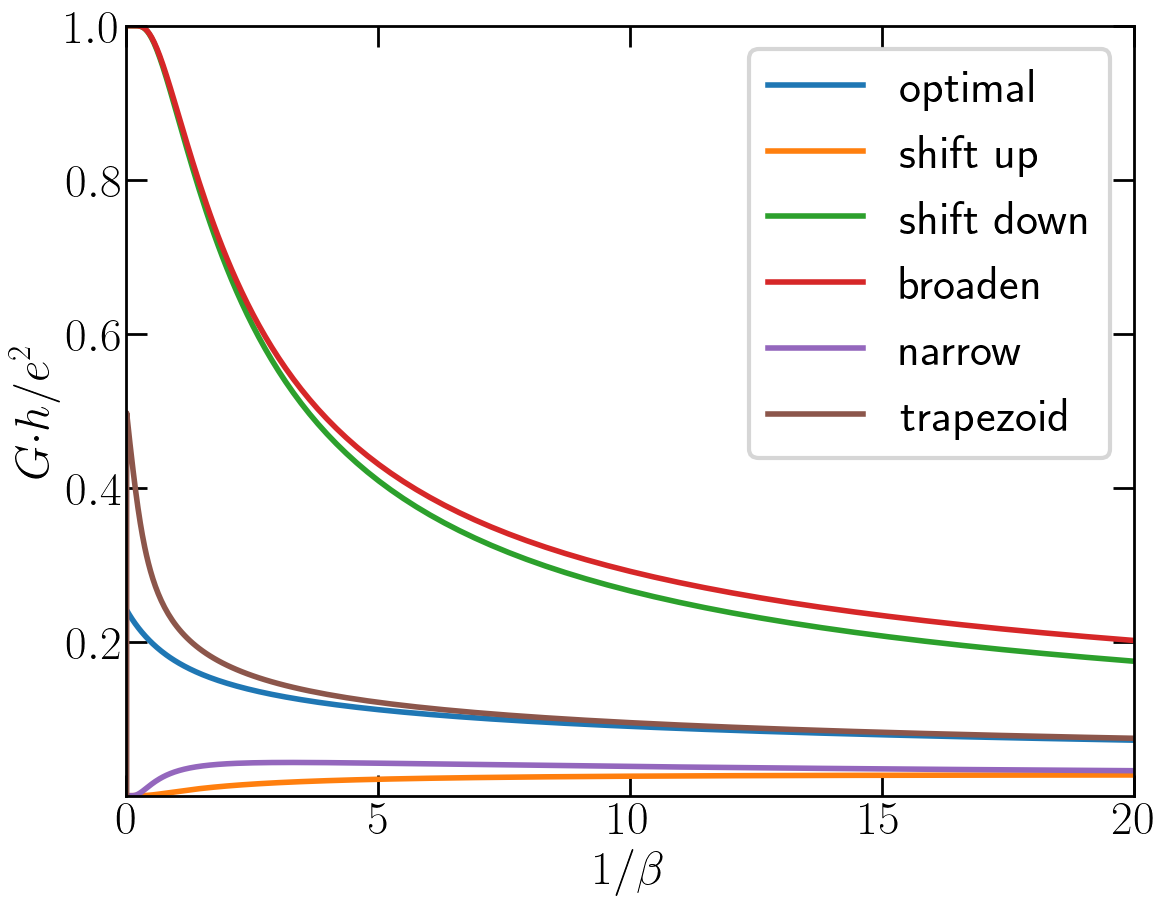

In [13]:
def plot_sigma(axes=None):
    y_list = [
        opt_coeff[:,0],
        data_shift_up[:,0],
        data_shift_down[:,0],
        data_broaden[:,0],
        data_narrow[:,0],
        data_trapezoid[:,0],
    ]
    legend_list = [
        'optimal',
        'shift up',
        'shift down',
        'broaden',
        'narrow',
        'trapezoid',
    ]
    axes = multi_plot(data_opt[:,0], y_list, legend_list, axes)
    _, ax = axes
    ax.set_xlabel(r'$1/\beta$')
    ax.set_ylabel(r'$G{\cdot}h/e^2$')
    ax.legend()
    ax.set_xlim([0,20])
    ax.set_ylim([0, 1])
    ax.set_yticks([.2, .4, .6, .8, 1.])
    return axes
_ = plot_sigma()

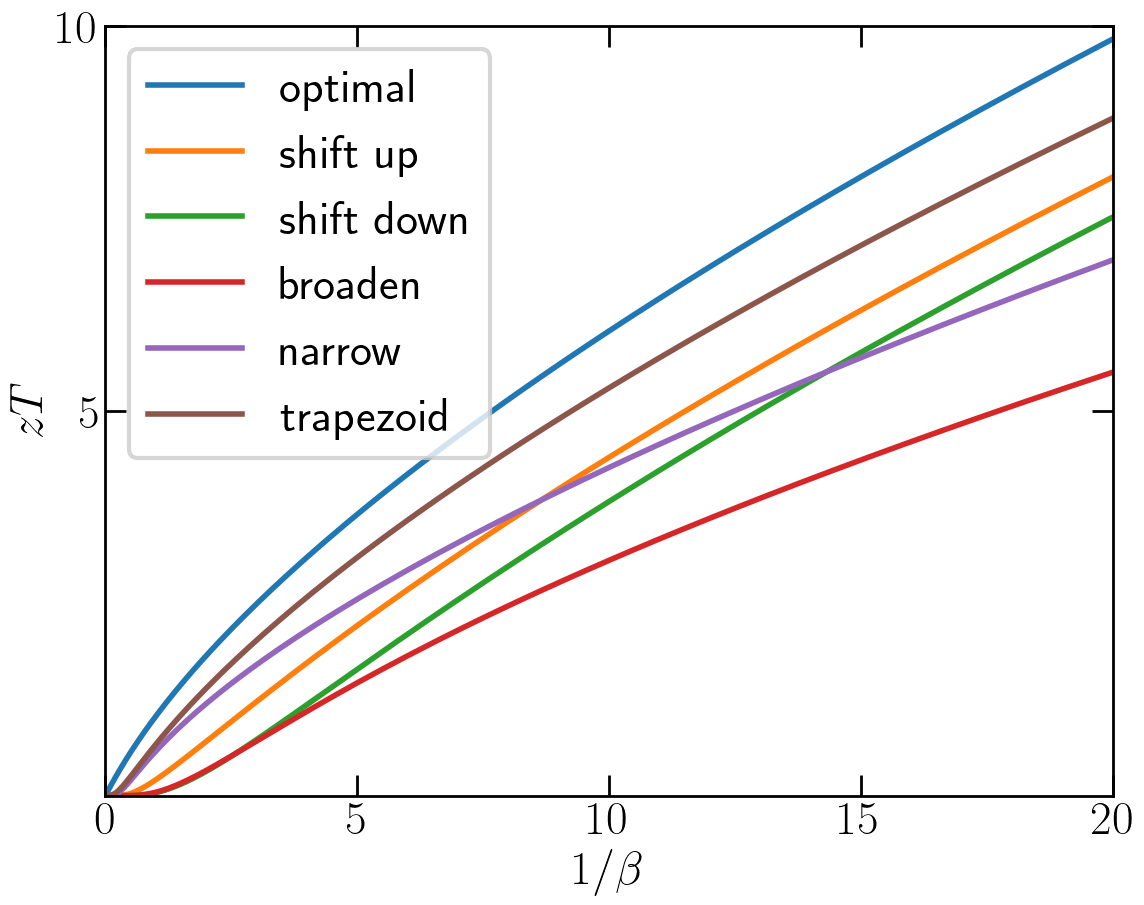

In [14]:
def plot_zT(axes=None):
    y_list = [
        opt_coeff[:,2],
        data_shift_up[:,2],
        data_shift_down[:,2],
        data_broaden[:,2],
        data_narrow[:,2],
        data_trapezoid[:,2],
    ]
    legend_list = [
        'optimal',
        'shift up',
        'shift down',
        'broaden',
        'narrow',
        'trapezoid',
    ]
    axes = multi_plot(data_opt[:,0], y_list, legend_list, axes)
    _, ax = axes
    ax.set_xlabel(r'$1/\beta$')
    ax.set_ylabel(r'$zT$')
    ax.legend()
    ax.set_xlim([0,20])
    ax.set_ylim([0, 10])
    ax.set_yticks([5, 10])
    return axes
_ = plot_zT()

In [15]:
import matplotlib.pyplot as plt
from dom import boxcar as boxcar_dom


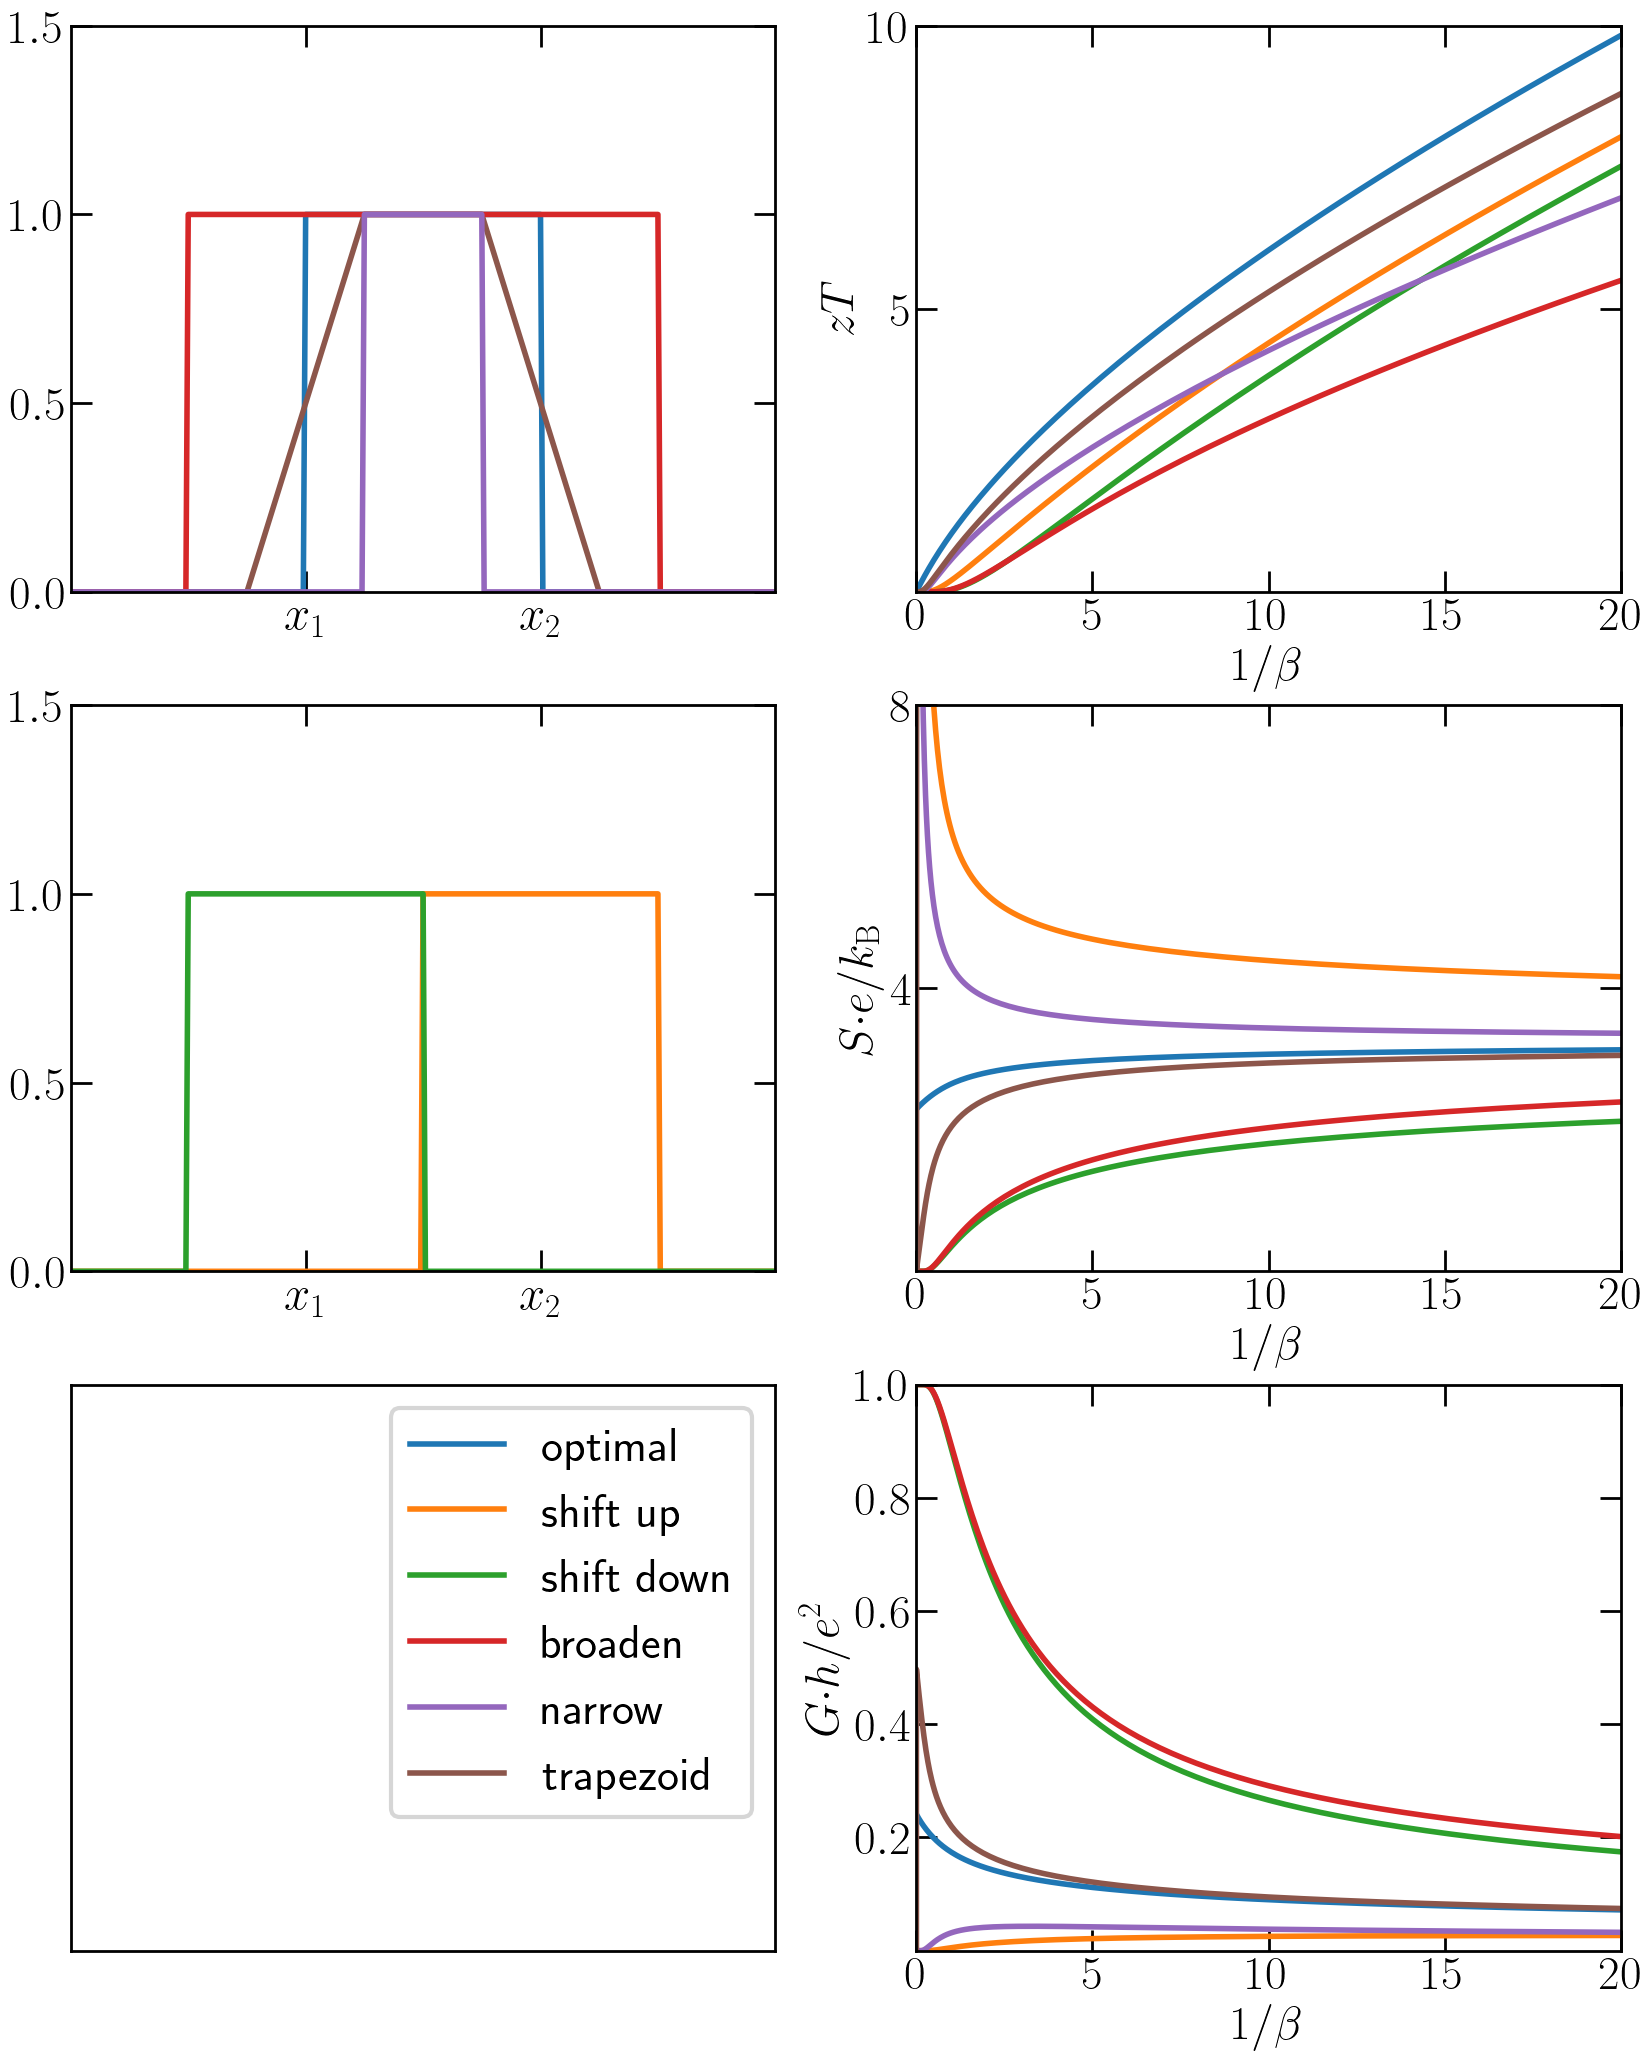

In [27]:
def plot_total(axes=None):
    if axes is None:
        axes = plt.subplots(3,2, figsize=(20, 25))
    fig, ((ax0, ax1), (ax2,ax3), (ax4,ax5)) = axes
    x_range = np.linspace(-3, 3, 301)
    ax0.plot(x_range, boxcar_dom(x_range, -1, 1), label='optimal')
    ax0.plot(x_range, trapezoid_dom(x_range, -1, 1), label='trapezoid', color='#8c564b')
    ax0.plot(x_range, boxcar_dom(x_range, -2, 2), label='broaden', color='#d62728')
    ax0.plot(x_range, boxcar_dom(x_range, -.5, .5), label='narrow', color='#9467bd')
    ax2.plot(x_range, boxcar_dom(x_range, 0, 2), label='shift up', color='#ff7f0e')
    ax2.plot(x_range, boxcar_dom(x_range, -2, 0), label='shift down', color='#2ca02c')
    ax0.set_xlim([-3,3])
    ax2.set_xlim([-3,3])
    # ax4.set_xlim([-3,3])
    ax0.set_ylim([0,1.5])
    ax2.set_ylim([0,1.5])
    # ax4.set_ylim([0,1.5])
    ax0.set_xticks([-1,1])
    ax0.set_xticklabels([r"$x_1$", r"$x_2$"])
    ax2.set_xticks([-1,1])
    ax2.set_xticklabels([r"$x_1$", r"$x_2$"])
    ax4.set_xticks([])
    ax4.set_yticks([])
    plot_zT((fig, ax1))
    plot_seebeck((fig, ax3))
    plot_sigma((fig, ax5))
    ax1.legend('', frameon=False)
    ax3.legend('', frameon=False)
    ax5.legend('', frameon=False)
    ax4.legend(handles=ax1.lines)
    # fig.legend()
_ = plot_total()